In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading the csv files as dataframes
train_features_df= pd.read_csv('training_set_features.csv')
train_labels_df=pd.read_csv('training_set_labels.csv')
test_features_df=pd.read_csv('test_set_features.csv')

In [4]:
train_features_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [5]:
train_labels_df.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [6]:
df= pd.merge(train_features_df,train_labels_df,on='respondent_id')

In [7]:
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


Let's check the dataframe and do some data cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [9]:
df.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [10]:
df.age_group.unique()

array(['55 - 64 Years', '35 - 44 Years', '18 - 34 Years', '65+ Years',
       '45 - 54 Years'], dtype=object)

In [11]:
df.race.unique()

array(['White', 'Black', 'Other or Multiple', 'Hispanic'], dtype=object)

In [12]:
df.marital_status.unique()

array(['Not Married', 'Married', nan], dtype=object)

In [13]:
df.employment_status.unique()

array(['Not in Labor Force', 'Employed', 'Unemployed', nan], dtype=object)

In [14]:
df.census_msa.unique()

array(['Non-MSA', 'MSA, Not Principle  City', 'MSA, Principle City'],
      dtype=object)

In [15]:
df.hhs_geo_region.unique()

array(['oxchjgsf', 'bhuqouqj', 'qufhixun', 'lrircsnp', 'atmpeygn',
       'lzgpxyit', 'fpwskwrf', 'mlyzmhmf', 'dqpwygqj', 'kbazzjca'],
      dtype=object)

We will drop the features employment_industry, employment_occupation as they have half of the dataset are null values and they don't have a high buisness meaning

In [16]:
df=df.drop(['employment_industry', 'employment_occupation'],axis=1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [18]:
df['health_insurance'].value_counts()

1.0    12697
0.0     1736
Name: health_insurance, dtype: int64

We will fill in the health_insurance, income_poverty feature with the mode as it have too much null values and it is important feature in the buisness case.

In [19]:
df.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'h1n1_vaccine',
       'seasonal_vaccine'],
      dtype='object')

In [20]:
cols=['behavioral_antiviral_meds', 'behavioral_avoidance',
      'behavioral_face_mask', 'behavioral_wash_hands',
      'behavioral_large_gatherings', 'behavioral_outside_home',
      'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
      'child_under_6_months', 'health_worker', 'health_insurance']

In [21]:
#df[cols].fillna(df[cols].mode().iloc[0])
df[cols]=df[cols].fillna(df.mode().iloc[0])

In [22]:
df['income_poverty'].fillna(df['income_poverty'].mode()[0],inplace=True)

Let's check the features that need to be encoded as sex, race, marital_status,... etc.

In [23]:
df.income_poverty.value_counts()

<= $75,000, Above Poverty    17200
> $75,000                     6810
Below Poverty                 2697
Name: income_poverty, dtype: int64

In [24]:
#df=df.dropna()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26707 non-null  float64
 4   behavioral_avoidance         26707 non-null  float64
 5   behavioral_face_mask         26707 non-null  float64
 6   behavioral_wash_hands        26707 non-null  float64
 7   behavioral_large_gatherings  26707 non-null  float64
 8   behavioral_outside_home      26707 non-null  float64
 9   behavioral_touch_face        26707 non-null  float64
 10  doctor_recc_h1n1             26707 non-null  float64
 11  doctor_recc_seasonal         26707 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [26]:
df.isnull().sum()

respondent_id                     0
h1n1_concern                     92
h1n1_knowledge                  116
behavioral_antiviral_meds         0
behavioral_avoidance              0
behavioral_face_mask              0
behavioral_wash_hands             0
behavioral_large_gatherings       0
behavioral_outside_home           0
behavioral_touch_face             0
doctor_recc_h1n1                  0
doctor_recc_seasonal              0
chronic_med_condition           971
child_under_6_months              0
health_worker                     0
health_insurance                  0
opinion_h1n1_vacc_effective     391
opinion_h1n1_risk               388
opinion_h1n1_sick_from_vacc     395
opinion_seas_vacc_effective     462
opinion_seas_risk               514
opinion_seas_sick_from_vacc     537
age_group                         0
education                      1407
race                              0
sex                               0
income_poverty                    0
marital_status              

In [27]:
df=df.dropna()

In [28]:
len(df)

23861

In [29]:
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,0,0


In [30]:
df=pd.get_dummies(df,columns=['age_group','education','race', 'income_poverty','employment_status','census_msa','hhs_geo_region'])

In [31]:
encode_cols={'sex':{'Male':0, 'Female':1},
             'rent_or_own':{'Rent':0, 'Own':1},
             'marital_status':{'Not Married':0, 'Married':1}}

In [32]:
df=df.replace(encode_cols)

In [33]:
X=df.drop(axis=1,labels=['respondent_id', 'h1n1_vaccine','seasonal_vaccine'])
y_h1n1=df['h1n1_vaccine']
y_seas =df['seasonal_vaccine']

In [34]:
from sklearn.model_selection import train_test_split

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y_h1n1, test_size=0.25, random_state=42)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y_seas, test_size=0.25, random_state=42)

Baseline Model (Logistic Regression Model):

In [35]:
from sklearn.linear_model import LogisticRegression

lr_1=LogisticRegression(class_weight='balanced',random_state=42, solver='newton-cg')
lr_2=LogisticRegression(class_weight='balanced',random_state=42,solver='newton-cg')

lr_1.fit(X_train_1,y_train_1)
lr_2.fit(X_train_2,y_train_2)

y_pred_1=lr_1.predict(X_test_1)
y_pred_2=lr_2.predict(X_test_2)

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

print('LR Accuracy score for h1n1 vaccine: ',accuracy_score(y_test_1, y_pred_1))
print('LR Accuracy score for seasonal vaccine: ',accuracy_score(y_test_2, y_pred_2))

print('LR AUC score for h1n1 vaccine: ', roc_auc_score(y_test_1, y_pred_1))
print('LR AUC score for seasonal vaccine: ', roc_auc_score(y_test_2, y_pred_2))

LR Accuracy score for h1n1 vaccine:  0.7847804223935635
LR Accuracy score for seasonal vaccine:  0.7861213543412672
LR AUC score for h1n1 vaccine:  0.7612739901368526
LR AUC score for seasonal vaccine:  0.7852165513181201


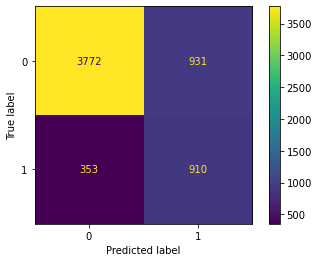

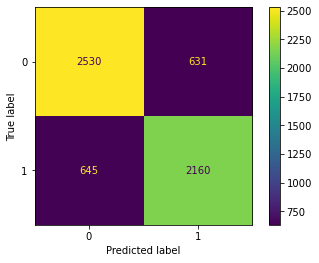

In [37]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(lr_1, X_test_1, y_test_1);
plot_confusion_matrix(lr_2, X_test_2, y_test_2);
plt.show()

In [38]:
lr_2.get_params()

{'C': 1.0,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'newton-cg',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Model 2 (Decision Tree):

In [39]:
from sklearn.tree import DecisionTreeClassifier
clf_1 = DecisionTreeClassifier(random_state=42, class_weight='balanced', max_depth=8)
clf_2 = DecisionTreeClassifier(random_state=42, class_weight='balanced', max_depth=8)

clf_1.fit(X_train_1,y_train_1)
clf_2.fit(X_train_2,y_train_2)

y_pred_1=clf_1.predict(X_test_1)
y_pred_2=clf_2.predict(X_test_2)

In [40]:
print('DT Accuracy score for h1n1 vaccine: ',accuracy_score(y_test_1, y_pred_1))
print('DT Accuracy score for seasonal vaccine: ',accuracy_score(y_test_2, y_pred_2))

print('DT AUC score for h1n1 vaccine: ', roc_auc_score(y_test_1, y_pred_1))
print('DT AUC score for seasonal vaccine: ', roc_auc_score(y_test_2, y_pred_2))

DT Accuracy score for h1n1 vaccine:  0.7834394904458599
DT Accuracy score for seasonal vaccine:  0.7705330204492122
DT AUC score for h1n1 vaccine:  0.7389954593427587
DT AUC score for seasonal vaccine:  0.7714897077291704


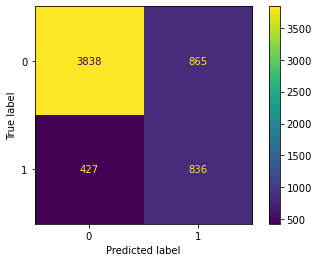

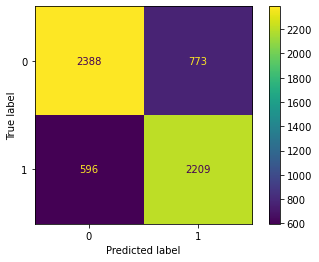

In [41]:
plot_confusion_matrix(clf_1, X_test_1, y_test_1);
plot_confusion_matrix(clf_2, X_test_2, y_test_2);


Model 3(Random Forest):

In [42]:
from sklearn.ensemble import RandomForestClassifier

rf_clf_1 = RandomForestClassifier(max_depth=8, random_state=42, class_weight='balanced')
rf_clf_2 = RandomForestClassifier(max_depth=8, random_state=42, class_weight='balanced')

rf_clf_1.fit(X_train_1, y_train_1)
rf_clf_2.fit(X_train_2, y_train_2)


y_pred_1=rf_clf_1.predict(X_test_1)
y_pred_2=rf_clf_2.predict(X_test_2)

In [43]:
print('RF Accuracy score for h1n1 vaccine: ',accuracy_score(y_test_1, y_pred_1))
print('RF Accuracy score for seasonal vaccine: ',accuracy_score(y_test_2, y_pred_2))

print('RF AUC score for h1n1 vaccine: ', roc_auc_score(y_test_1, y_pred_1))
print('RF AUC score for seasonal vaccine: ', roc_auc_score(y_test_2, y_pred_2))

RF Accuracy score for h1n1 vaccine:  0.794334562520952
RF Accuracy score for seasonal vaccine:  0.7861213543412672
RF AUC score for h1n1 vaccine:  0.75256599912894
RF AUC score for seasonal vaccine:  0.7845139148524153


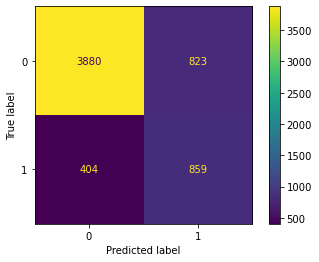

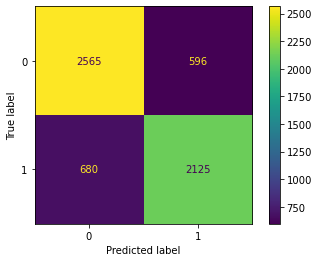

In [44]:
plot_confusion_matrix(rf_clf_1, X_test_1, y_test_1);
plot_confusion_matrix(rf_clf_2, X_test_2, y_test_2);

Model 4 (Gradient Boost Classifier) :

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf_1 = GradientBoostingClassifier(max_depth=9, random_state=42, learning_rate=0.05)
gb_clf_2 = GradientBoostingClassifier(max_depth=9, random_state=42, learning_rate=0.05)

gb_clf_1.fit(X_train_1,y_train_1)
gb_clf_2.fit(X_train_2,y_train_2)


y_pred_1 = gb_clf_1.predict(X_test_1)
y_pred_2 = gb_clf_2.predict(X_test_2)

In [46]:
print('GB Accuracy score for h1n1 vaccine: ',accuracy_score(y_test_1, y_pred_1))
print('GB Accuracy score for seasonal vaccine: ',accuracy_score(y_test_2, y_pred_2))

print('GB AUC score for h1n1 vaccine: ', roc_auc_score(y_test_1, y_pred_1))
print('GB AUC score for seasonal vaccine: ', roc_auc_score(y_test_2, y_pred_2))

GB Accuracy score for h1n1 vaccine:  0.8359034528997653
GB Accuracy score for seasonal vaccine:  0.7807576265504526
GB AUC score for h1n1 vaccine:  0.6958262183013858
GB AUC score for seasonal vaccine:  0.779110944944542


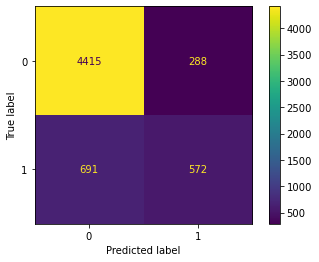

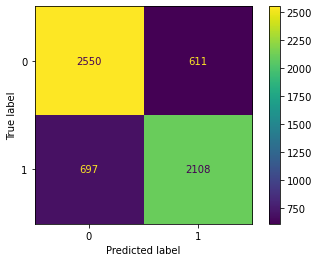

In [47]:
plot_confusion_matrix(gb_clf_1, X_test_1, y_test_1);
plot_confusion_matrix(gb_clf_2, X_test_2, y_test_2);

Model 5 (AdaBoost Classifier) :

In [48]:
from sklearn.ensemble import AdaBoostClassifier

ab_clf_1 = AdaBoostClassifier(random_state=42, learning_rate=1.2)
ab_clf_2 = AdaBoostClassifier(random_state=42, learning_rate=1.2)


ab_clf_1.fit(X_train_1,y_train_1)
ab_clf_2.fit(X_train_2,y_train_2)


y_pred_1 = ab_clf_1.predict(X_test_1)
y_pred_2 = ab_clf_2.predict(X_test_2)

In [49]:
print('AB Accuracy score for h1n1 vaccine: ',accuracy_score(y_test_1, y_pred_1))
print('AB Accuracy score for seasonal vaccine: ',accuracy_score(y_test_2, y_pred_2))

print('AB AUC score for h1n1 vaccine: ', roc_auc_score(y_test_1, y_pred_1))
print('AB AUC score for seasonal vaccine: ', roc_auc_score(y_test_2, y_pred_2))

AB Accuracy score for h1n1 vaccine:  0.8354006034193765
AB Accuracy score for seasonal vaccine:  0.7876299027824338
AB AUC score for h1n1 vaccine:  0.683634997219645
AB AUC score for seasonal vaccine:  0.7851947278580698


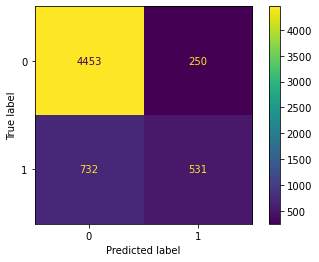

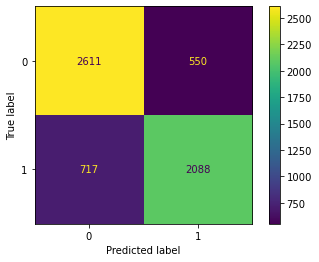

In [50]:
plot_confusion_matrix(ab_clf_1, X_test_1, y_test_1);
plot_confusion_matrix(ab_clf_2, X_test_2, y_test_2);

Model 6 (XGBoost Classifier) :

In [51]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X_train_1.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train_1.columns.values]
X_train_2.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train_2.columns.values]
X_test_1.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_test_1.columns.values]
X_test_2.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_test_2.columns.values]

X.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X.columns.values]


In [52]:
from xgboost import XGBClassifier

xgb_clf_1 = XGBClassifier(random_state=42)
xgb_clf_2 = XGBClassifier(random_state=42)

xgb_clf_1.fit(X_train_1, y_train_1)
xgb_clf_2.fit(X_train_2,y_train_2)


y_pred_1 = xgb_clf_1.predict(X_test_1)
y_pred_2 = xgb_clf_2.predict(X_test_2)

In [53]:
print('XGB Accuracy score for h1n1 vaccine: ',accuracy_score(y_test_1, y_pred_1))
print('XGB Accuracy score for seasonal vaccine: ',accuracy_score(y_test_2, y_pred_2))

print('XGB AUC score for h1n1 vaccine: ', roc_auc_score(y_test_1, y_pred_1))
print('XGB AUC score for seasonal vaccine: ', roc_auc_score(y_test_2, y_pred_2))

XGB Accuracy score for h1n1 vaccine:  0.8310425745893396
XGB Accuracy score for seasonal vaccine:  0.7787462286288971
XGB AUC score for h1n1 vaccine:  0.6907161059743709
XGB AUC score for seasonal vaccine:  0.7773533387356266


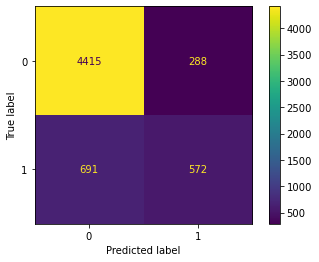

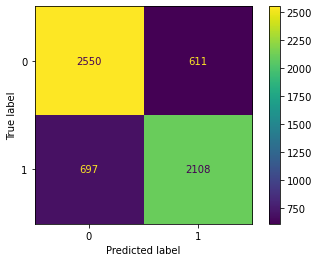

In [54]:
plot_confusion_matrix(gb_clf_1, X_test_1, y_test_1);
plot_confusion_matrix(gb_clf_2, X_test_2, y_test_2);

Model 5 (SVM model):

In [55]:
from sklearn import svm

svm_clf_1 = svm.SVC(class_weight='balanced', kernel='sigmoid')
svm_clf_2 = svm.SVC(class_weight='balanced', kernel='sigmoid')

svm_clf_1.fit(X_train_1, y_train_1)
svm_clf_2.fit(X_train_2, y_train_2)

y_pred_1=svm_clf_1.predict(X_test_1)
y_pred_2=svm_clf_1.predict(X_test_2)

In [56]:
print('SVM Accuracy score for h1n1 vaccine: ',accuracy_score(y_test_1, y_pred_1))
print('SVM Accuracy score for seasonal vaccine: ',accuracy_score(y_test_2, y_pred_2))

print('SVM AUC score for h1n1 vaccine: ', roc_auc_score(y_test_1, y_pred_1))
print('SVM AUC score for seasonal vaccine: ', roc_auc_score(y_test_2, y_pred_2))

SVM Accuracy score for h1n1 vaccine:  0.38367415353670803
SVM Accuracy score for seasonal vaccine:  0.40445859872611467
SVM AUC score for h1n1 vaccine:  0.3788729890407043
SVM AUC score for seasonal vaccine:  0.4078010129017815


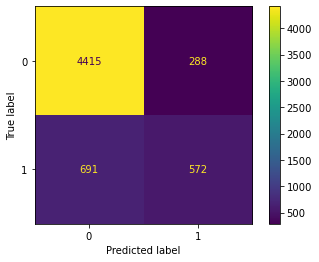

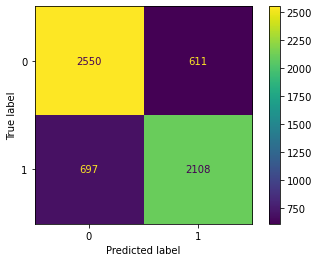

In [57]:
plot_confusion_matrix(gb_clf_1, X_test_1, y_test_1);
plot_confusion_matrix(gb_clf_2, X_test_2, y_test_2);

Try Cross Validation on dataset:

In [58]:
from sklearn.model_selection import cross_val_score

print('Cross validation for LR in h1n1: ',cross_val_score(lr_1, X, y_h1n1, cv=5, scoring='roc_auc'))
print('Cross validation for LR in Seasonal: ',cross_val_score(lr_2, X, y_seas, cv=5, scoring='roc_auc'))
print('****************************************************************************')

print('Average CV "Accuracy" in LR for h1n1: ', np.mean(cross_val_score(lr_1, X, y_h1n1, cv=5, scoring='accuracy')))
print('Average CV "Accuracy" in LR for Seasonal: ',np.mean(cross_val_score(lr_2, X, y_seas, cv=5, scoring='accuracy')))
print('****************************************************************************')

print('Average CV "roc_auc" in LR for h1n1: ', np.mean(cross_val_score(lr_1, X, y_h1n1, cv=5, scoring='roc_auc')))
print('Average CV "roc_auc" in LR for Seasonal: ',np.mean(cross_val_score(lr_2, X, y_seas, cv=5, scoring='roc_auc')))


Cross validation for LR in h1n1:  [0.83385611 0.83596616 0.84065486 0.84155612 0.82423819]
Cross validation for LR in Seasonal:  [0.84538872 0.85435329 0.85333835 0.85474449 0.85696724]
****************************************************************************
Average CV "Accuracy" in LR for h1n1:  0.7795984643291608
Average CV "Accuracy" in LR for Seasonal:  0.7780062533927132
****************************************************************************
Average CV "roc_auc" in LR for h1n1:  0.8352542870120867
Average CV "roc_auc" in LR for Seasonal:  0.8529584200471352


In [59]:
print('Cross validation for DT in h1n1: ',cross_val_score(clf_1, X, y_h1n1, cv=5, scoring='roc_auc'))
print('Cross validation for DT in Seasonal: ',cross_val_score(clf_2, X, y_seas, cv=5, scoring='roc_auc'))
print('****************************************************************************')

print('Average CV "Accuracy" in DT for h1n1: ', np.mean(cross_val_score(clf_1, X, y_h1n1, cv=5, scoring='accuracy')))
print('Average CV "Accuracy" in DT for Seasonal: ',np.mean(cross_val_score(clf_2, X, y_seas, cv=5, scoring='accuracy')))
print('****************************************************************************')

print('Average CV "roc_auc" in DT for h1n1: ', np.mean(cross_val_score(clf_1, X, y_h1n1, cv=5, scoring='roc_auc')))
print('Average CV "roc_auc" in DT for Seasonal: ',np.mean(cross_val_score(clf_2, X, y_seas, cv=5, scoring='roc_auc')))

Cross validation for DT in h1n1:  [0.79593331 0.80273034 0.80525851 0.8130473  0.78732827]
Cross validation for DT in Seasonal:  [0.82031454 0.82641742 0.82252533 0.82481401 0.8347031 ]
****************************************************************************
Average CV "Accuracy" in DT for h1n1:  0.7763710863829776
Average CV "Accuracy" in DT for Seasonal:  0.7618711198381367
****************************************************************************
Average CV "roc_auc" in DT for h1n1:  0.8008595442087033
Average CV "roc_auc" in DT for Seasonal:  0.8257548791769234


In [60]:
print('Cross validation for RF in h1n1: ',cross_val_score(rf_clf_1, X, y_h1n1, cv=5, scoring='roc_auc'))
print('Cross validation for RF in Seasonal: ',cross_val_score(rf_clf_2, X, y_seas, cv=5, scoring='roc_auc'))
print('****************************************************************************')

print('Average CV "Accuracy" in RF for h1n1: ', np.mean(cross_val_score(rf_clf_1, X, y_h1n1, cv=5, scoring='accuracy')))
print('Average CV "Accuracy" in RF for Seasonal: ',np.mean(cross_val_score(rf_clf_2, X, y_seas, cv=5, scoring='accuracy')))
print('****************************************************************************')

print('Average CV "roc_auc" in RF for h1n1: ', np.mean(cross_val_score(rf_clf_1, X, y_h1n1, cv=5, scoring='roc_auc')))
print('Average CV "roc_auc" in RF for Seasonal: ',np.mean(cross_val_score(rf_clf_2, X, y_seas, cv=5, scoring='roc_auc')))

Cross validation for RF in h1n1:  [0.82926517 0.83084989 0.83972884 0.84211996 0.82131839]
Cross validation for RF in Seasonal:  [0.84447939 0.85342791 0.85262312 0.85573387 0.85297465]
****************************************************************************
Average CV "Accuracy" in RF for h1n1:  0.791961752586716
Average CV "Accuracy" in RF for Seasonal:  0.7792215186394411
****************************************************************************
Average CV "roc_auc" in RF for h1n1:  0.8326564513665465
Average CV "roc_auc" in RF for Seasonal:  0.8518477882608584


In [61]:
print('Cross validation for GB in h1n1: ',cross_val_score(gb_clf_1, X, y_h1n1, cv=5, scoring='roc_auc'))
print('Cross validation for GB in Seasonal: ',cross_val_score(gb_clf_2, X, y_seas, cv=5, scoring='roc_auc'))
print('****************************************************************************')

print('Average CV "Accuracy" in GB for h1n1: ', np.mean(cross_val_score(gb_clf_1, X, y_h1n1, cv=5, scoring='accuracy')))
print('Average CV "Accuracy" in GB for Seasonal: ',np.mean(cross_val_score(gb_clf_2, X, y_seas, cv=5, scoring='accuracy')))
print('****************************************************************************')

print('Average CV "roc_auc" in GB for h1n1: ', np.mean(cross_val_score(gb_clf_1, X, y_h1n1, cv=5, scoring='roc_auc')))
print('Average CV "roc_auc" in GB for Seasonal: ',np.mean(cross_val_score(gb_clf_2, X, y_seas, cv=5, scoring='roc_auc')))

Cross validation for GB in h1n1:  [0.82297915 0.82331514 0.82749133 0.83527308 0.81574437]
Cross validation for GB in Seasonal:  [0.84296225 0.85127656 0.84935035 0.85279818 0.85844179]
****************************************************************************
Average CV "Accuracy" in GB for h1n1:  0.8307699305379572
Average CV "Accuracy" in GB for Seasonal:  0.7788444412364957
****************************************************************************
Average CV "roc_auc" in GB for h1n1:  0.8249606145273667
Average CV "roc_auc" in GB for Seasonal:  0.8509658259185949


In [62]:
print('Cross validation for AB in h1n1: ',cross_val_score(ab_clf_1, X, y_h1n1, cv=5, scoring='roc_auc'))
print('Cross validation for AB in Seasonal: ',cross_val_score(ab_clf_2, X, y_seas, cv=5, scoring='roc_auc'))
print('****************************************************************************')

print('Average CV "Accuracy" in AB for h1n1: ', np.mean(cross_val_score(ab_clf_1, X, y_h1n1, cv=5, scoring='accuracy')))
print('Average CV "Accuracy" in AB for Seasonal: ',np.mean(cross_val_score(ab_clf_2, X, y_seas, cv=5, scoring='accuracy')))
print('****************************************************************************')

print('Average CV "roc_auc" in AB for h1n1: ', np.mean(cross_val_score(ab_clf_1, X, y_h1n1, cv=5, scoring='roc_auc')))
print('Average CV "roc_auc" in AB for Seasonal: ',np.mean(cross_val_score(ab_clf_2, X, y_seas, cv=5, scoring='roc_auc')))

Cross validation for AB in h1n1:  [0.83389073 0.83747595 0.84199568 0.84041111 0.82309477]
Cross validation for AB in Seasonal:  [0.84540132 0.85476389 0.85376763 0.85974144 0.85802784]
****************************************************************************
Average CV "Accuracy" in AB for h1n1:  0.8347931724781175
Average CV "Accuracy" in AB for Seasonal:  0.7807303463232429
****************************************************************************
Average CV "roc_auc" in AB for h1n1:  0.8353736467004461
Average CV "roc_auc" in AB for Seasonal:  0.8543404255176282


In [63]:
print('Cross validation for XGB in h1n1: ',cross_val_score(xgb_clf_1, X, y_h1n1, cv=5, scoring='roc_auc'))
print('Cross validation for XGB in Seasonal: ',cross_val_score(xgb_clf_2, X, y_seas, cv=5, scoring='roc_auc'))
print('****************************************************************************')

print('Average CV "Accuracy" in XGB for h1n1: ', np.mean(cross_val_score(xgb_clf_1, X, y_h1n1, cv=5, scoring='accuracy')))
print('Average CV "Accuracy" in XGB for Seasonal: ',np.mean(cross_val_score(xgb_clf_2, X, y_seas, cv=5, scoring='accuracy')))
print('****************************************************************************')

print('Average CV "roc_auc" in XGB for h1n1: ', np.mean(cross_val_score(xgb_clf_1, X, y_h1n1, cv=5, scoring='roc_auc')))
print('Average CV "roc_auc" in XGB for Seasonal: ',np.mean(cross_val_score(xgb_clf_2, X, y_seas, cv=5, scoring='roc_auc')))

Cross validation for XGB in h1n1:  [0.82526121 0.82658043 0.82710727 0.83004608 0.81411913]
Cross validation for XGB in Seasonal:  [0.83806632 0.84800864 0.84487717 0.84996597 0.85091974]
****************************************************************************
Average CV "Accuracy" in XGB for h1n1:  0.8300993697258733
Average CV "Accuracy" in XGB for Seasonal:  0.7752820463107213
****************************************************************************
Average CV "roc_auc" in XGB for h1n1:  0.8246228235567958
Average CV "roc_auc" in XGB for Seasonal:  0.846367569727555


Trying another way for handling the dataset:

In [64]:
df_2=pd.merge(train_features_df,train_labels_df,on='respondent_id')

In [65]:
df_2.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [66]:
len(df_2)

26707

In [67]:
df_2=df_2.dropna()

In [68]:
len(df_2)

6437

In [69]:
from imblearn.over_sampling import SMOTE

oversample_1 = SMOTE()

X, y_h1n1 = oversample_1.fit_resample(X, y_h1n1)


In [70]:
len(y_seas)

23861

In [71]:
len(y_h1n1)

37478

In [72]:
len(X)

37478

In [73]:
df['seasonal_vaccine'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
26701    False
26702    False
26703    False
26705    False
26706    False
Name: seasonal_vaccine, Length: 23861, dtype: bool

In [74]:
len(df['seasonal_vaccine'])

23861

In [75]:
oversample_2 = SMOTE()

X, y_seas = oversample_1.fit_resample(X, y_seas)

ValueError: Found input variables with inconsistent numbers of samples: [37478, 23861]